In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")  
# load dataset
df=pd.read_csv(r"D:\project\telecom-churn-analysis\data\WA_Fn-UseC_-Telco-Customer-Churn.xls")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# data cleaning 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['Churn'] =df['Churn'].map({'Yes':1 , 'No': 0 })
df.drop(columns=['customerID'], inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [7]:
# EDA - churn rate overall 
churn_rate = df['Churn'].mean()
print("Overall churn rate:", churn_rate)


Overall churn rate: 0.2644922375729953


In [8]:
# EDA - Churn by contract type
print(df.groupby('Contract')['Churn'].mean())


Contract
Month-to-month    0.426421
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [9]:
# EDA - Churn by payment method 
print(df.groupby('PaymentMethod')['Churn'].mean())

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.451462
Mailed check                 0.189223
Name: Churn, dtype: float64


In [10]:
# EDA - churn by tenure group
df['tenure_group']= pd.cut(df['tenure'],
                           bins=[0,12,24,48,72],
                           labels=['0-12(1 yr)','13-24(2 yr)','25-48(3 yr)','49-72(4 yr)'])
df.groupby('tenure_group')['Churn'].mean()

C:\Users\nikhil mahale\AppData\Local\Temp\ipykernel_10608\2272923119.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn'].mean()


tenure_group
0-12(1 yr)     0.476080
13-24(2 yr)    0.287109
25-48(3 yr)    0.203890
49-72(4 yr)    0.095132
Name: Churn, dtype: float64

In [11]:
# Average Monthly Charges for churned vs non-churned customers
print(df.groupby('Churn')['MonthlyCharges'].mean())


Churn
0    61.344878
1    74.604308
Name: MonthlyCharges, dtype: float64


In [12]:
## 6. Feature Engineering
# - Number of services subscribed
# - Average spend per month
# - Engagement score
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies']
df['num_services'] =df[service_cols].apply(lambda row:sum(row=='Yes'),axis=1)
df['AvgSpendPerMonth'] = df['TotalCharges'] / (df['tenure']+1)
df['EngagementScore'] = df['num_services'] / (df['tenure']+1)

print(df[['num_services','AvgSpendPerMonth','EngagementScore']].head())

   num_services  AvgSpendPerMonth  EngagementScore
0             1         14.925000         0.500000
1             2         53.985714         0.057143
2             2         36.050000         0.666667
3             3         40.016304         0.065217
4             0         50.550000         0.000000


C:\Users\nikhil mahale\AppData\Local\Temp\ipykernel_10608\2045327836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette=["skyblue","salmon"])


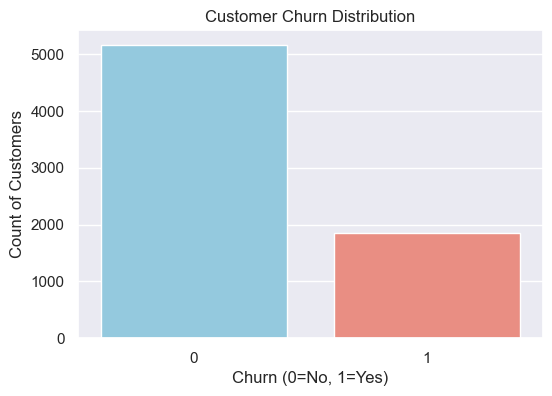

In [23]:
# churn distribution- Majority of customers did not churn.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette=["skyblue","salmon"])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count of Customers")
plt.show()

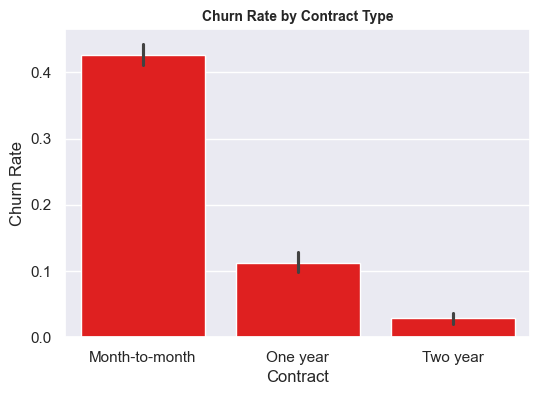

In [14]:
# churn distribution - shows what % of customers churn vs stay
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Contract", y="Churn", color="red")
plt.title("Churn Rate by Contract Type", fontsize=10, fontweight="bold")
plt.ylabel("Churn Rate")
plt.show()

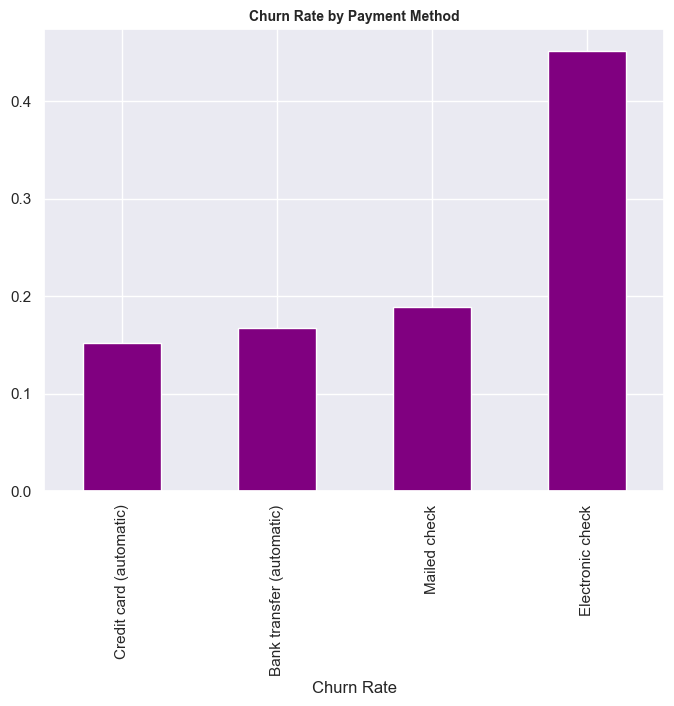

In [16]:
#churn by payment method 
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().sort_values()

plt.figure(figsize=(8,6))
churn_by_payment.plot(kind='bar', color='purple') 
plt.title("Churn Rate by Payment Method" , fontsize=10 , fontweight='bold')
plt.xlabel("Churn Rate")
plt.show()

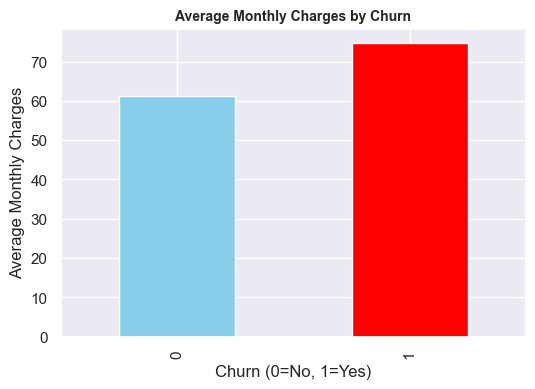

In [17]:
# monthly charges vs churn - churners often pay higher monthly charges 
monthly_avg = df.groupby('Churn')['MonthlyCharges'].mean()

plt.figure(figsize=(6,4))
monthly_avg.plot(kind='bar', color=['skyblue', 'red'])
plt.title("Average Monthly Charges by Churn", fontsize=10, fontweight='bold')
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Average Monthly Charges")
plt.show()

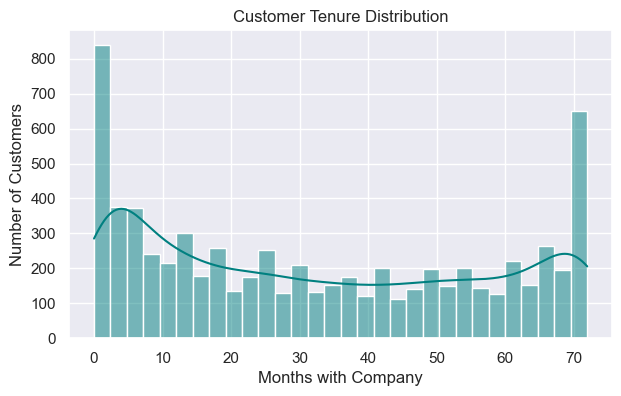

In [18]:
# tenure distribution - helps to see if customers leave early or stick long term 
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="tenure", bins=30, kde=True, color="teal")
plt.title("Customer Tenure Distribution")
plt.xlabel("Months with Company")
plt.ylabel("Number of Customers")
plt.show()



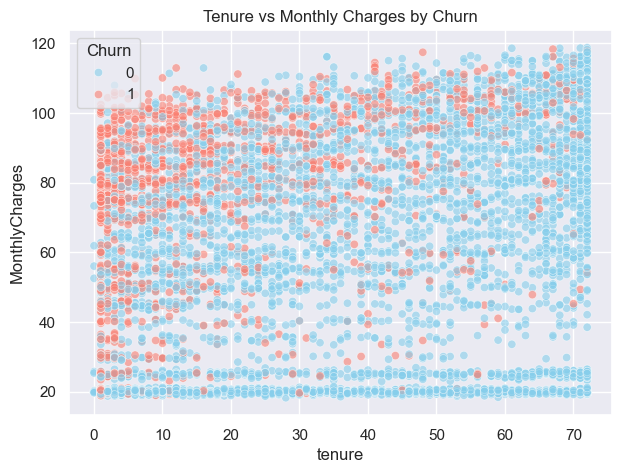

In [19]:
# Tenure vs Monthly Charges Scatter- Customers with short tenure and high charges are more likely to churn.
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn",
                alpha=0.6, palette=["skyblue","salmon"])
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()

In [20]:
## 7. Key Insights (using Pandas only)
# - Which groups have highest churn rates?
# - Which group brings highest revenue loss?
lost_revenue = df.loc[df['Churn']==1, 'MonthlyCharges'].sum()
print("Total lost monthly revenue from churners:", lost_revenue)

churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
print("Churn by contract:", churn_by_contract)


Total lost monthly revenue from churners: 138540.19999999998
Churn by contract: Contract
Month-to-month    0.426421
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [21]:
df.to_csv("tele.csv",index= False)